### Importing required library

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import joblib

In [17]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

In [18]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [19]:
# Preprocess the data
df.fillna(" ", inplace=True)
df["v2"] = df["v2"] + df["Unnamed: 2"] + df["Unnamed: 3"] + df['Unnamed: 4']
df = df.drop(["Unnamed: 2", "Unnamed: 3", 'Unnamed: 4'], axis=1)

In [20]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [21]:
# Create target variable
target = pd.get_dummies(df["v1"], drop_first=True)
df = df.drop("v1", axis=1)
df = pd.concat([df, target], axis=1)

In [23]:
df.head(10)

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",False
1,Ok lar... Joking wif u oni...,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,True
3,U dun say so early hor... U c already then say...,False
4,"Nah I don't think he goes to usf, he lives aro...",False
5,FreeMsg Hey there darling it's been 3 week's n...,True
6,Even my brother is not like to speak with me. ...,False
7,As per your request 'Melle Melle (Oru Minnamin...,False
8,WINNER!! As a valued network customer you have...,True
9,Had your mobile 11 months or more? U R entitle...,True


In [22]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.v2, df.spam, test_size=0.2, random_state=42)


In [24]:
X_train.head(5)

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935    They r giving a second chance to rahul dengra.   
4078    O i played smash bros  &lt;#&gt;  religiously.   
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: v2, dtype: object

In [26]:
y_train.head(5)

1978    False
3989     True
3935    False
4078    False
4086     True
Name: spam, dtype: bool

In [27]:
# Build the pipeline
pipe = Pipeline([('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [28]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [29]:
# Evaluate the model
score = pipe.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Model Accuracy: 0.9838565022421525


In [30]:
# Predict on test data
y_pred = pipe.predict(X_test)

In [31]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



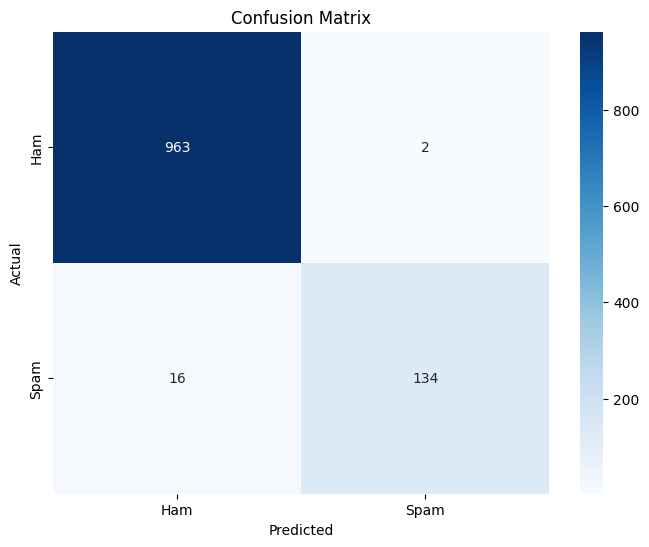

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Save the model to a file
model_filename = 'spam_detection_model.pkl'
joblib.dump(pipe, model_filename)
print(f"Model saved as {model_filename}")

Model saved as spam_detection_model.pkl


### Using the Model after Loading

In [35]:
# Load the model from file (example)
loaded_model = joblib.load(model_filename)

In [36]:
sample_message = ["The offer is valid only for today, so hurry up"]
prediction = loaded_model.predict(sample_message)
print(f"Prediction for the sample message: {'Spam' if prediction[0] == 1 else 'Ham'}")

Prediction for the sample message: Ham
